In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# 全カラムを表示させる
pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## データを概観する

In [4]:
# scikit-learn付属のデータセットをロード
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

data = pd.DataFrame(diabetes.data, columns=("age", "sex", "bmi", "map", "tc", "ldl", "hdl", "tch", "ltg", "glu"))
data['y'] = diabetes.target

data.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
data.describe()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


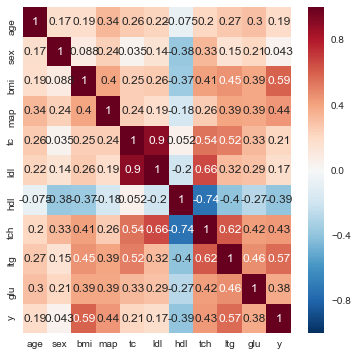

In [6]:
# パラメータ間の相関係数を可視化
plt.figure(figsize=(6, 6))
sns.heatmap(data.corr(), annot=True)
plt.show()

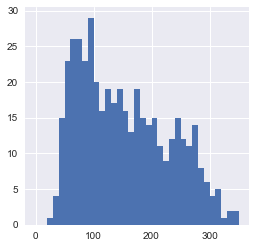

In [7]:
# 結果変数(y)の分布を確認
plt.figure(figsize=(4, 4))
plt.hist(data.y, range=(0, 350), bins=35)
plt.show()

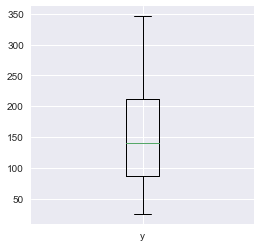

In [8]:
plt.figure(figsize=(4, 4))
plt.boxplot(data.y, labels=['y'])
plt.show()

## モデルの設計

### パラメータ無し(切片のみ)

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model0 = smf.glm('y ~ 1', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result0 = model0.fit(disp=0)

print('AIC:', result0.aic)
result0.summary()

AIC: 5041.186062839457


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  442
Model:                            GLM   Df Residuals:                      441
Model Family:                   Gamma   Df Model:                            0
Link Function:                    log   Scale:              0.2567913084429238
Method:                          IRLS   Log-Likelihood:                -2519.6
Date:                Tue, 20 Mar 2018   Deviance:                       126.80
Time:                        23:07:43   Pearson chi2:                     113.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0248      0.024    208.466      0.000       4.978       5.072
==============================================================================
"""

### パラメータ1つ(bmi)

In [10]:
model1 = smf.glm('y ~ bmi', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result1 = model1.fit(disp=0)

print('AIC:', result1.aic)
result1.summary()

AIC: 4883.66124171387


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                      y   No. Observations:                   442
Model:                            GLM   Df Residuals:                       440
Model Family:                   Gamma   Df Model:                             1
Link Function:                    log   Scale:              0.18678249693360058
Method:                          IRLS   Log-Likelihood:                 -2439.8
Date:                Tue, 20 Mar 2018   Deviance:                        89.670
Time:                        23:07:45   Pearson chi2:                      82.2
No. Iterations:                     4                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9828      0.021    242.389      0.000       4.942       5.023
bmi            6.0930      0.432     14.098      0.000       5.246       6.940
==============================================================================
"""

### パラメータ2つ(bmi+sex)

In [11]:
model2 = smf.glm('y ~ bmi+sex', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result2 = model2.fit(disp=0)

print('AIC:', result2.aic)
result2.summary()

AIC: 4885.365291972465


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                      y   No. Observations:                   442
Model:                            GLM   Df Residuals:                       439
Model Family:                   Gamma   Df Model:                             2
Link Function:                    log   Scale:              0.18694403522478933
Method:                          IRLS   Log-Likelihood:                 -2439.7
Date:                Tue, 20 Mar 2018   Deviance:                        89.619
Time:                        23:07:47   Pearson chi2:                      82.1
No. Iterations:                     5                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9827      0.021    242.281      0.000       4.942       5.023
bmi            6.1221      0.434     14.104      0.000       5.271       6.973
sex           -0.2286      0.434     -0.527      0.598      -1.079       0.622
==============================================================================
"""

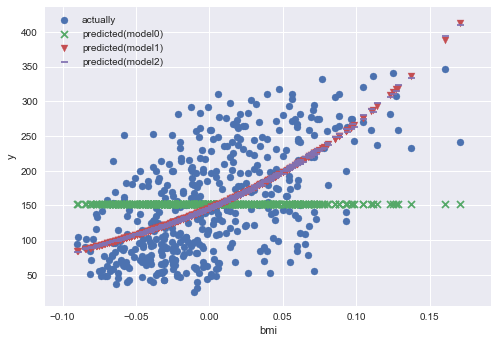

In [12]:
plt.scatter(data.bmi.values, data.y.values, marker='o', label='actually')
plt.scatter(data.bmi.values, result0.predict(), marker='x', label='predicted(model0)')
plt.scatter(data.bmi.values, result1.predict(), marker='v', label='predicted(model1)')
plt.scatter(data.bmi.values, result2.predict(), marker='_', label='predicted(model2)')
plt.legend()
plt.xlabel('bmi')
plt.ylabel('y')
plt.show()

### ldlとageの交互作用項

In [13]:
model_ldl = smf.glm('y ~ ldl', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result_ldl = model_ldl.fit(disp=0)

print('AIC:', result_ldl.aic)
result_ldl.summary()

AIC: 5029.627402410305


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  442
Model:                            GLM   Df Residuals:                      440
Model Family:                   Gamma   Df Model:                            1
Link Function:                    log   Scale:              0.2567039521717285
Method:                          IRLS   Log-Likelihood:                -2512.8
Date:                Tue, 20 Mar 2018   Deviance:                       123.31
Time:                        23:07:53   Pearson chi2:                     113.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0208      0.024    208.338      0.000       4.974       5.068
ldl            1.8906      0.507      3.732      0.000       0.898       2.884
==============================================================================
"""

In [14]:
model_age = smf.glm('y ~ age', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result_age = model_age.fit(disp=0)

print('AIC:', result_age.aic)
result_age.summary()

AIC: 5027.887356125991


<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                  
===============================================================================
Dep. Variable:                      y   No. Observations:                   442
Model:                            GLM   Df Residuals:                       440
Model Family:                   Gamma   Df Model:                             1
Link Function:                    log   Scale:              0.25229905356939386
Method:                          IRLS   Log-Likelihood:                 -2511.9
Date:                Tue, 20 Mar 2018   Deviance:                        122.77
Time:                        23:07:57   Pearson chi2:                      111.
No. Iterations:                     5                                          
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0202      0.024    210.123      0.000       4.973       5.067
age            2.0050      0.502      3.992      0.000       1.021       2.990
==============================================================================
"""

In [15]:
model3 = smf.glm('y ~ ldl+age', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result3 = model3.fit(disp=0)

print('AIC:', result3.aic)
result3.summary()

AIC: 5019.939140159227


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  442
Model:                            GLM   Df Residuals:                      439
Model Family:                   Gamma   Df Model:                            2
Link Function:                    log   Scale:               0.250545207131875
Method:                          IRLS   Log-Likelihood:                -2507.0
Date:                Tue, 20 Mar 2018   Deviance:                       120.23
Time:                        23:07:58   Pearson chi2:                     110.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0173      0.024    210.737      0.000       4.971       5.064
ldl            1.6220      0.513      3.162      0.002       0.617       2.628
age            1.7698      0.513      3.450      0.001       0.764       2.775
==============================================================================
"""

In [16]:
model4 = smf.glm('y ~ ldl+age+ldl:age', data=data, family=sm.families.Gamma(link=sm.families.links.log))
result4 = model4.fit(disp=0)

print('AIC:', result4.aic)
result4.summary()

AIC: 5014.413561464431


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  442
Model:                            GLM   Df Residuals:                      438
Model Family:                   Gamma   Df Model:                            3
Link Function:                    log   Scale:              0.2444278043043418
Method:                          IRLS   Log-Likelihood:                -2503.2
Date:                Tue, 20 Mar 2018   Deviance:                       118.23
Time:                        23:07:59   Pearson chi2:                     107.
No. Iterations:                     6                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0294      0.024    208.853      0.000       4.982       5.077
ldl            1.4894      0.507      2.935      0.003       0.495       2.484
age            1.6421      0.509      3.226      0.001       0.644       2.640
ldl:age      -28.9194     10.456     -2.766      0.006     -49.413      -8.426
==============================================================================
"""